<a href="https://colab.research.google.com/github/enakai00/colab_rlbook/blob/master/Chapter04/04_Maze_Solver_Monte_Calro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 12

In [0]:
def get_maze():
  maze_img = '''
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#          #
#         G#
############
'''
  maze = []
  for line in maze_img.split('\n'):
    if line == '':
      continue 
    maze.append(list(line))

  return maze

In [0]:
class Agent:
  def __init__(self, maze):
    self.maze = maze
    size_y, size_x = len(maze), len(maze[0])
    self.states = [(x, y) for x in range(size_x) for y in range(size_y)]
    self.actions = [(0, -1), (-1, 0), (1, 0), (0, 1)]

    self.policy = {}
    for s in self.states:
      self.policy[s] = self.actions[np.random.randint(len(self.actions))]

    self.q = {}
    self.cnt = {}
    for s in self.states:
      for a in self.actions:
        self.q[(s, a)] = -10**10
        self.cnt[(s, a)] = 0

  def move(self, s, a):
    x, y = s
    dx, dy = a
    if self.maze[y][x] == 'G':
      return 0, s

    x += dx
    y += dy
    if self.maze[y][x] == 'G':
      return 0, (x, y)

    if self.maze[y][x] == '#':
      x -= dx
      y -= dy
 
    return -1, (x, y)

In [0]:
def get_episode(agent, epsilon):
  episode = []
  s = (1, 1) # Start
  while True:
    if np.random.random() < epsilon:
      a = agent.actions[np.random.randint(len(agent.actions))]
    else:
      a = agent.policy[s]

    r, s_new = agent.move(s, a)
    episode.append((s, a, r))
    x, y = s_new
    if agent.maze[y][x] == 'G':
      break
    s = s_new

  return episode

In [0]:
def policy_update(agent, s):
  q_max = -10**10
  a_best = None
  for a in agent.actions:
    if agent.q[(s, a)] > q_max:
      q_max = agent.q[(s, a)]
      a_best = a

  agent.policy[s] = a_best

In [0]:
def train(agent, epsilon, min_epsilon):
  episode_lengths = []
  max_data_length = 0

  while True:
    episode = get_episode(agent, epsilon)
    episode_lengths.append(len(episode))
    episode.reverse()
    total_r = 0
    last = False
    data_length = 0

    for (s, a, r) in episode:
      data_length += 1

      if a != agent.policy[s]:
        last = True

      total_r += r
      agent.cnt[(s, a)] += 1
      agent.q[(s, a)] += (total_r - agent.q[(s, a)]) / agent.cnt[(s, a)]
      policy_update(agent, s)

      if last:
        break

    epsilon *= 0.999
    if epsilon < min_epsilon:
      break

    if data_length > max_data_length:
      max_data_length = data_length
      result = np.copy(agent.maze)
      for (s, a, r) in episode[:data_length]:
        x, y = s
        result[y][x] = '+'
      print('epsilon={}'.format(epsilon))
      for line in result:
        print (''.join(line))
      print ('')

  return episode_lengths

In [0]:
maze = get_maze()
agent = Agent(maze)

In [8]:
%%time
episode_lengths = train(agent, epsilon=0.9, min_epsilon=0.01)

epsilon=0.8991
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#         +#
#         G#
############

epsilon=0.8919323245132865
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#          #
#     ++++G#
############

epsilon=0.8629646679760956
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#   +      #
#   ++++++G#
############

epsilon=0.6924691414083393
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#   ++     #
#   ++++++G#
############

epsilon=0.6780717911048761
############
#S         #
#          #
#######    #
#          #
#          #
#    #######
#  ++++++++#
#         G#
############

epsilon=0.6679716041772392
############
#S         #
#          #
#######    #
#          #
#          #
#  + #######
#  ++++++++#
#         G#
############

epsilon=0.6271678090739116
############
#S         #
#          

In [9]:
episode = get_episode(agent, epsilon=0)

result = np.copy(agent.maze)
for (s, a, r) in episode:
  x, y = s
  result[y][x] = '+'

for line in result:
  print (''.join(line))

############
#+++       #
#  +++++   #
#######+   #
#     ++   #
#   +++    #
#   +#######
#   +++++++#
#         G#
############


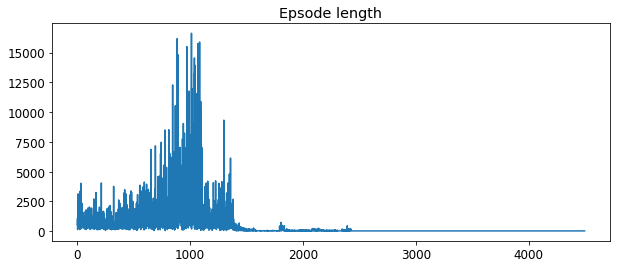

In [10]:
fig = plt.figure(figsize=(10, 4))
subplot = fig.add_subplot(1, 1, 1)
subplot.set_title('Epsode length')
subplot.plot(range(len(episode_lengths)), episode_lengths)